In [3]:
from collections import Counter
from urllib import request

## Introduction

Sources of textual data:

- Wikipedia
- Twitter
- Facebook
- News websites
- Emails
- .... and many more

Why text analytics?

- Machine translation
- Contextual disambiguation
- Information Extraction
- Classification: hate speech, spam, etc.
- Document retrieval
- Sentiment analysis
- Topic modelling

- Classical data analysis: structured data, e.g. age, location, income

## Example 1 (lexicon approach)

We begin with a small example that to showcase one of the problems associated with unstructured textual data.
In the following we read file `ballet.txt` from GitHub storage and decode it. The file contains  The goal in this example is to classify
each sentence into four categories depending on the gender mentioned in each sentence: "male", "female", "mixed" or "unknown".

In [4]:
url_handle = request.urlopen("https://raw.githubusercontent.com/boyko/text-analytics-script/main/data/ballet.txt")
articles = url_handle.read().decode("utf-8")
print(articles[:300])

With apologies to James Brown, the hardest working people in show business may well be ballet dancers. And at New York City Ballet, none work harder than the dancers in its lowest rank, the corps de ballet. During the first week of the company’s winter season, Claire Kretzschmar, 24, a rising corps 


First we divide the articles into individual sentences by splitting the string by ".".

In [5]:
articles_sent = articles.split(".")

print(f"The articles consist of {len(articles_sent)} sentences.")

The articles consist of 167 sentences.


In [6]:
MALE_WORDS = set([
    'guy', 'spokesman', 'chairman', "men's", 'men', 'him', "he's", 'his',
    'boy', 'boyfriend', 'boyfriends', 'boys', 'brother', 'brothers', 'dad',
    'dads', 'dude', 'father', 'fathers', 'fiance', 'gentleman', 'gentlemen',
    'god', 'grandfather', 'grandpa', 'grandson', 'groom', 'he', 'himself',
    'husband', 'husbands', 'king', 'male', 'man', 'mr', 'nephew', 'nephews',
    'priest', 'prince', 'son', 'sons', 'uncle', 'uncles', 'waiter', 'widower',
    'widowers'
])

FEMALE_WORDS = set([
    'heroine', 'spokeswoman', 'chairwoman', "women's", 'actress', 'women',
    "she's", 'her', 'aunt', 'aunts', 'bride', 'daughter', 'daughters', 'female',
    'fiancee', 'girl', 'girlfriend', 'girlfriends', 'girls', 'goddess',
    'granddaughter', 'grandma', 'grandmother', 'herself', 'ladies', 'lady',
    'mom', 'moms', 'mother', 'mothers', 'mrs', 'ms', 'niece', 'nieces',
    'priestess', 'princess', 'queens', 'she', 'sister', 'sisters', 'waitress',
    'widow', 'widows', 'wife', 'wives', 'woman'
])

We define a simple function to classify each sentence, then apply it on each sentence in the `articles_sent` list.

In [7]:
def classify_sentence_gender(sentence):
    words = sentence.split(' ')
    female_words = len(FEMALE_WORDS.intersection(words))
    male_words =  len(MALE_WORDS.intersection(words))

    if male_words > 0 and female_words == 0:
        return 'male'
    if male_words == 0 and female_words > 0:
        return 'female'
    if male_words == 0 and female_words == 0:
        return 'unknown'

    return 'mixed'

categories = list(map(classify_sentence_gender, articles_sent))

In [8]:
print(categories)

['unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mixed', 'unknown', 'unknown', 'unknown', 'unkn

In [9]:
counter = Counter(categories)
print(counter)

Counter({'unknown': 120, 'female': 42, 'male': 4, 'mixed': 1})


# Artificial classification example

In this example we look at two small sets of texts grouped into two classes: `positive_texts` and `negative_texts`.

In [5]:
import nltk
import pandas as pd

positive_texts = [
    "we love you",
    "they love us",
    "you are good",
    "he is good",
    "they love mary"
]

neg_texts = [
    "we hate you",
    "they hate us",
    "you are bad",
    "he is bad",
    "we hate mary"
]

test_texts = [
    "they love mary",
    "they are good",
    "why do you hate mary",
    "they are almost always good",
    "we are very bad"
]

Combine `negative_texts` and `positive_texts` into a single list.


In [6]:
all_texts = positive_texts + neg_texts
all_texts

['we love you',
 'they love us',
 'you are good',
 'he is good',
 'they love mary',
 'we hate you',
 'they hate us',
 'you are bad',
 'he is bad',
 'we hate mary']

Create a list of all words occurring in the texts.


In [7]:
def get_words(text):
    # return list([word for word in text.split(' ')])
    for word in text.split(' '):
        yield word

all_words = [word for text in all_texts for word in get_words(text)]
all_words

['we',
 'love',
 'you',
 'they',
 'love',
 'us',
 'you',
 'are',
 'good',
 'he',
 'is',
 'good',
 'they',
 'love',
 'mary',
 'we',
 'hate',
 'you',
 'they',
 'hate',
 'us',
 'you',
 'are',
 'bad',
 'he',
 'is',
 'bad',
 'we',
 'hate',
 'mary']

The vocabulary is the list of all words (tokens) occurring in the documents.

In [8]:
unique_words = list(set(all_words))
unique_words.sort()
unique_words

['are',
 'bad',
 'good',
 'hate',
 'he',
 'is',
 'love',
 'mary',
 'they',
 'us',
 'we',
 'you']

Calculate the frequency distribution of words using nltk.FreqDist. Tabulate the result and plot
the distribution of the 5 most common words.

In [9]:
word_freqs = nltk.FreqDist(all_words)
word_freqs.tabulate()

 you   we love they hate   us  are good   he   is mary  bad 
   4    3    3    3    3    2    2    2    2    2    2    2 


What are the 3 most common words?


In [10]:
word_freqs.most_common(3)

[('you', 4), ('we', 3), ('love', 3)]

In what percent of the text does the word "mary" occur?

In [11]:
word_freqs.freq('mary')


0.06666666666666667

Write a function that creates a vector of the same length as
the number of unique words for each text. At each index the list
should have value 1 if the vocabulary word is contained in the text
and zero otherwise.

In [13]:
def vectorize_text(text):
    text_vec = [0] * len(unique_words)
    text_words = text.split(' ')

    for i in range(len(unique_words)):
        unique_word = unique_words[i]
        if unique_word in text_words:
            text_vec[i] = 1

    return text_vec

def vectorize_collection(col):
    return map(vectorize_text, col)

text_vectors = list(vectorize_collection(all_texts))
text_vectors_df = pd.DataFrame(text_vectors, columns = unique_words)
text_vectors_df

,are,bad,good,hate,he,is,love,mary,they,us,we,you
0,0,0,0,0,0,0,1,0,0,0,1,1
1,0,0,0,0,0,0,1,0,1,1,0,0
2,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,0,0
5,0,0,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,0,0,0,0,1,1,0,0
7,1,1,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,1,1,0,0,0,0,0,0
9,0,0,0,1,0,0,0,1,0,0,1,0


Create a new list `labels` that contains "positive" for positive texts and "negative" for negative texts.

In [14]:
labels = ["positive"] * len(positive_texts) + ["negative"] * len(neg_texts)
labels

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative']

Train a classification tree (use default settings) on the vectorized texts


['negative' 'positive']


[Text(0.6, 0.8333333333333334, 'love <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.5, 'good <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

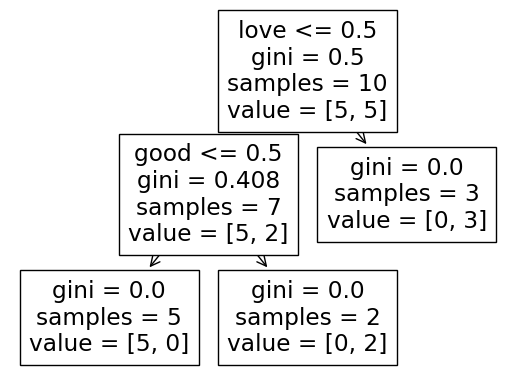

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier = DecisionTreeClassifier(random_state=0, max_leaf_nodes=3)
classifier.fit(text_vectors, labels)
# print(unique_words)
print(classifier.classes_)

plot_tree(classifier, feature_names=text_vectors_df.columns)

Predict the class of the test texts.

In [17]:
test_texts = [
    "they love mary",
    "they are good",
    "why do you hate mary",
    "they are almost always good",
    "we are very bad"
]

test_text_vectors = list(vectorize_collection(test_texts))

predictions = classifier.predict(test_text_vectors)
predictions

array(['positive', 'positive', 'negative', 'positive', 'negative'],
      dtype='<U8')